Farhan Reypialfarizi 1301200033

Muhammad Reyfasha Ilhami 1301204461

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io.arff import loadarff 

Generate Dataset

In [ ]:
data = pd.read_csv('data_1602_gyro_watch.arff', comment='@', header=None)
t = data[0].values
x = data[1].values

In [ ]:
# LPF Filter
fc = 25  # Cut-off frequency
w = fc / (1000 / 2)  # Normalize the frequency
b, a = signal.butter(5, w, 'low')
y_lpf = signal.filtfilt(b, a, x)

In [ ]:
# MVA Filter
window_sizes = [10, 50, 100]  # Window sizes
y_mva = np.zeros((len(window_sizes), len(x)))
for i, size in enumerate(window_sizes):
    b = np.ones(size) / size
    y_mva[i, :] = np.convolve(x, b, mode='same')

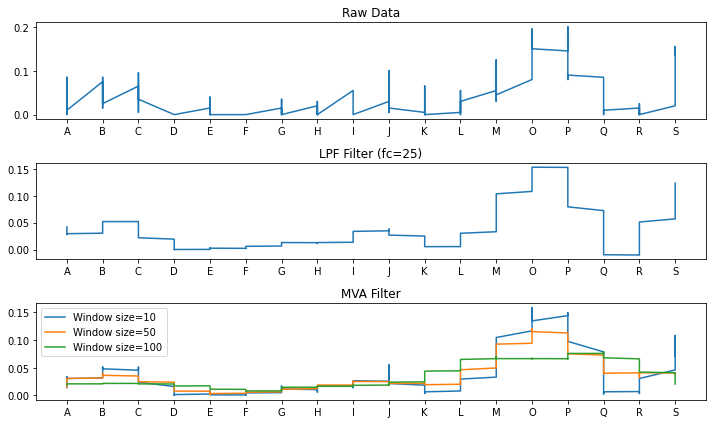

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Raw Data')
plt.subplot(3, 1, 2)
plt.plot(t, y_lpf)
plt.title(f'LPF Filter (fc={fc})')
plt.subplot(3, 1, 3)
for i, size in enumerate(window_sizes):
    plt.plot(t, y_mva[i, :], label=f'Window size={size}')
plt.title('MVA Filter')
plt.legend()
plt.tight_layout()
plt.show()

Kesimpulan : 
Dalam program ini kita akan menggunakan library pandas untuk memuat data dari file ARFF. Kami juga menggunakan library Scipy untuk mengimplementasikan pemfilteran sinyal/data menggunakan filter LPF dan MVA. 

Untuk filter LPF, kami menggunakan frekuensi cutoff 25 Hz. Frekuensi cut-off ini dipilih berdasarkan karakteristik data yang akan diolah. Misalnya, jika datanya adalah data EEG, kita dapat memilih frekuensi cut-off 25 Hz karena frekuensi maksimum sinyal EEG sekitar 10-20 Hz. 

Sedangkan, dalam filter MVA kami menggunakan tiga ukuran jendela yang berbeda, yaitu 10, 50 dan 100. Pemilihan ukuran jendela ini bergantung pada properti data yang diproses. Jika data berfluktuasi dengan cepat, kita dapat memilih ukuran jendela yang lebih kecil. Namun, jika ada fluktuasi data yang lebih lambat, kita dapat memilih ukuran jendela yang lebih besar.

Setelah pemfilteran sinyal/data, kami memplot data asli dan hasil yang difilter menggunakan library matplotlib. Pada grafik hasil filter MVA, kita dapat melihat bahwa ukuran jendela yang lebih besar menghasilkan data yang lebih halus. Ini karena ukuran jendela yang lebih besar dapat menghilangkan variasi kecil pada data. Namun, ukuran jendela yang lebih besar juga dapat memengaruhi waktu respons filter. 
